Final Project BI410 - Ava Wessel 

Research Question: What is the effect of temporal frequency, orientation, and there combined interaction on neuron firing rates in Drifting Grating Experiment? 

In [1430]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from scipy import stats

In [1431]:
#Load Data, Drifiting Grates 
drifting_gratings_stim = np.load('drifting_gratings_stim.npz')
drifting_gratings_spikes = np.load('drifting_gratings_spikes.npz')
drifting_gratings_areas = np.load('drifting_gratings_areas.npz')
drifting_gratings_running = np.load('drifting_gratings_running.npz')

In [1432]:
#Define variables to simplify
orientation = drifting_gratings_stim['orientation']
temp_freq = drifting_gratings_stim['temporal_frequency']
speed = drifting_gratings_running['speed']
timestamps = drifting_gratings_running['timestamps']

start_t = drifting_gratings_stim['start_time']
stop_t = drifting_gratings_stim['stop_time']
spikes = drifting_gratings_spikes.files

trials = len(start_t)
neurons = len(spikes)
total_time = stop_t - start_t

In [1435]:
#Creation of firing rates array per neuron 
firing_rates = np.zeros((trials, neurons))
vispm_id = []
id_list = []

#identifying each particular neuron 
for n, n_id in enumerate(spikes):
    spike_t = drifting_gratings_spikes[n_id]
    if drifting_gratings_areas[n_id] == 'VISpm':
        id_list.append(n_id)
        vispm_id.append(n)
    
    # calculate the firing rate for each particular neuron 
    for i in range(trials):
        start = start_t[i]
        stop = stop_t[i]
        
        times = spike_t[(spike_t >= start) & (spike_t <= stop)]
        rate = len(times) / total_time[i]
        firing_rates[i, n] = rate


In [1437]:
vispm_id

[643,
 644,
 646,
 648,
 650,
 651,
 658,
 664,
 665,
 676,
 677,
 678,
 679,
 686,
 688,
 692,
 693,
 703,
 704,
 705,
 707,
 709,
 710,
 711,
 712,
 717,
 718,
 719,
 731,
 732,
 734,
 742,
 746,
 748,
 749,
 752,
 754,
 755,
 760,
 761,
 766,
 767,
 771,
 772,
 773,
 774,
 792,
 793,
 794,
 805]

In [1440]:
# random.randint(0, 160), selection of neuron in VISpm. 

vispm = vispm_id[20]
vispm_firing = firing_rates[:, vispm]

vispm_firing

array([26.97720426, 38.9672675 , 42.46326927, 39.46684785, 30.47455375,
       51.45703338, 11.49046292, 14.98748545, 21.9820846 , 32.47272291,
       36.47118776, 35.47038223, 27.97635998, 21.9814257 , 27.97691904,
       18.9840534 , 16.98607142, 22.48111586, 34.97062468, 20.48310144,
       29.47509355, 10.49123981, 15.98665115, 12.98902427, 11.4901759 ,
       33.47205084, 20.98247963, 32.47304737, 21.48174052, 30.9741366 ,
       17.48539969, 38.46768714, 28.47608009, 39.46704502, 25.47859798,
       26.97733904, 33.97095483, 34.47121653, 57.45145352, 27.47705666,
       31.47324774, 25.97830811, 46.46166912, 24.47955957, 32.97246799,
       28.47622235, 34.97027527, 43.96307102, 24.97864326, 29.4752408 ,
       26.47762641, 45.4620392 , 50.45837184, 48.95911914, 35.47002783,
       53.95440852, 51.45651924, 32.47272291, 31.47340497, 35.97014478,
       36.46991232, 30.47455375, 33.47255251, 32.97230327, 31.47434841,
       50.45786768, 38.46749497, 29.97482115, 42.46390568, 29.47

In [1441]:
#Creation of dataframe
data = pd.DataFrame({'orientation': orientation, 
                     'temp freq': temp_freq,
                     'firing rates': vispm_firing,
                    'start time': start_t,
                    'stop time': stop_t})
data = data.dropna()
data['total time'] = data['stop time'] - data['start time']

In [1442]:
np.mean(vispm_firing)

25.38024668080299

In [1443]:
data

,orientation,temp freq,firing rates,start time,stop time,total time
0,315.0,4.0,26.977204,1574.774823,1576.776513,2.00169
1,90.0,8.0,38.967267,1577.777347,1579.779027,2.00168
2,225.0,2.0,42.463269,1580.779833,1582.781563,2.00173
3,90.0,2.0,39.466848,1583.782367,1585.784047,2.00168
4,135.0,8.0,30.474554,1586.784883,1588.786553,2.00167
...,...,...,...,...,...,...
623,135.0,15.0,13.488737,5366.976107,5368.977777,2.00167
624,180.0,8.0,33.471884,5369.978603,5371.980283,2.00168
625,0.0,1.0,50.956687,5372.981107,5374.982807,2.00170
626,180.0,4.0,39.966428,5375.983663,5377.985343,2.00168


In [1444]:
data['combined'] = data['orientation'] * data['temp freq']

In [1445]:
#Define regression model
regr = linear_model.LinearRegression()

In [1446]:
# Linear Regression between orientation and firing rate, test 1 

x1 = data[['orientation', 'temp freq','combined']]
y1 = data['firing rates']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

model = regr.fit(x1_train, y1_train)

r_squared = regr.score(x1_test, y1_test)

y_pred = model.predict(x1_test)

coef = model.coef_
intercept = model.intercept_

print(f"Model Coefficent: {coef}\nModel Intercept: {intercept}\nr2_value: {r_squared}")

Model Coefficent: [-0.04385346 -0.55662891  0.00163813]
Model Intercept: 33.85622877912371
r2_value: 0.17039027121880923


In [1447]:
# stats for orientation 

fit_orientation = stats.linregress(data['orientation'], data['firing rates'])

print('p-value: ', fit_orientation.pvalue)

p-value:  1.4898109153017838e-16


In [1448]:
# stats for temporal frequency 

fit_tempfreq = stats.linregress(data['temp freq'], data['firing rates'])

print('p-value: ', fit_tempfreq.pvalue)

p-value:  1.2250358081950284e-05


In [1449]:
# stats for combined

fit_combined = stats.linregress(data['combined'], data['firing rates'])

print('p-value: ', fit_combined.pvalue)

p-value:  6.648033884726797e-11


Text(0, 0.5, 'Mean Firing Rates (Hz)')

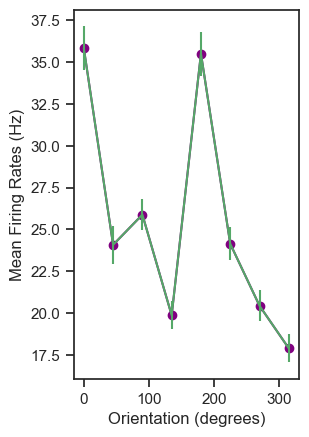

In [1450]:
#Tuning curve for Orientation 

orientation_means = data.pivot_table(values='firing rates', index='orientation', aggfunc=np.mean)
orientation_groupby = data.groupby('orientation')['firing rates'].mean()
orientation_sem = data.groupby('orientation')['firing rates'].sem()

plt.subplot(1, 2, 1)
plt.plot(orientation_means.index, orientation_means.values, marker='o', color = 'purple')
plt.errorbar(orientation_groupby.index, orientation_groupby, yerr = orientation_sem, color = 'g')
plt.xlabel("Orientation (degrees)")
plt.ylabel("Mean Firing Rates (Hz)")

Text(0, 0.5, 'Mean Firing Rates (Hz)')

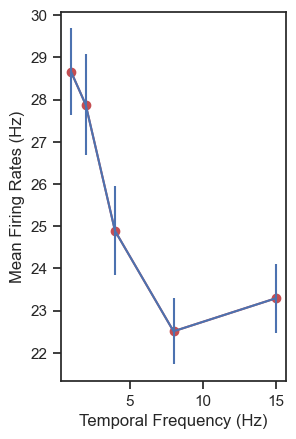

In [1451]:
#Tuning curve for temporal frequency 

tempfreq_means = data.pivot_table(values='firing rates', index='temp freq', aggfunc=np.mean)
tempfreq_groupby = data.groupby('temp freq')['firing rates'].mean()
tempfreq_sem = data.groupby('temp freq')['firing rates'].sem()

plt.subplot(1, 2, 2)
plt.plot(tempfreq_means.index, tempfreq_means.values, marker='o', color='r')
plt.errorbar(tempfreq_groupby.index, tempfreq_groupby, yerr = tempfreq_sem, color = 'b')
plt.xlabel("Temporal Frequency (Hz)")
plt.ylabel("Mean Firing Rates (Hz)")

Text(47.25, 0.5, 'Orientation (degrees)')

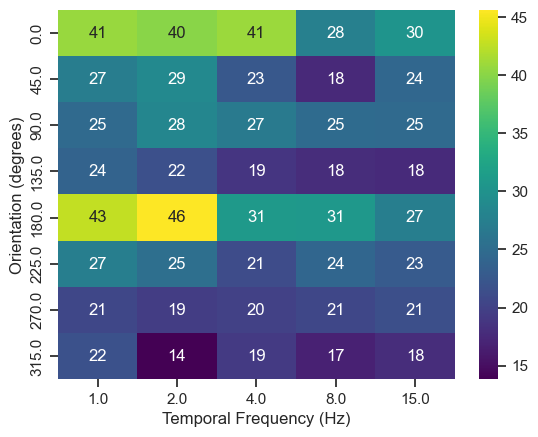

In [1452]:
#Tuning curve for combined
combined_table = data.pivot_table(values='firing rates', index='orientation', columns='temp freq', aggfunc='mean')

sns.heatmap(combined_table, cmap='viridis', annot=True)
plt.xlabel("Temporal Frequency (Hz)")
plt.ylabel("Orientation (degrees)")

Text(0.5, 0, 'Combined (Orientation & Temporal Frequency)')

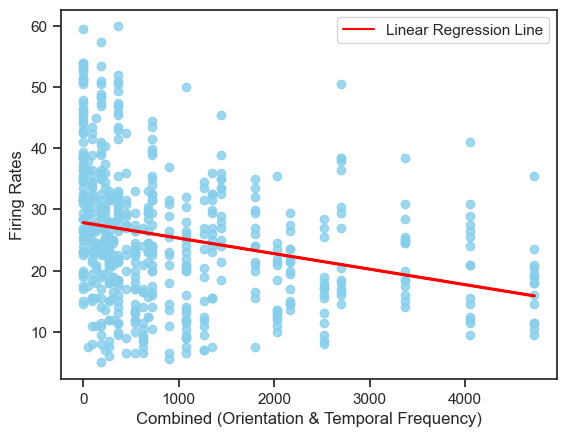

In [1453]:
#Linear Regression of Combined and Firing Rates, was not used for paper 
sns.regplot(x ='combined', y = 'firing rates', data=data, color = "skyblue", 
            line_kws=dict(color="red"), ci = False)
plt.plot(data['combined'], alpha + beta * data['combined'], color='red', label='Linear Regression Line')
plt.legend()
plt.ylabel("Firing Rates")
plt.xlabel("Combined (Orientation & Temporal Frequency)")

Text(16.694444444444443, 0.5, 'Firing Rates')

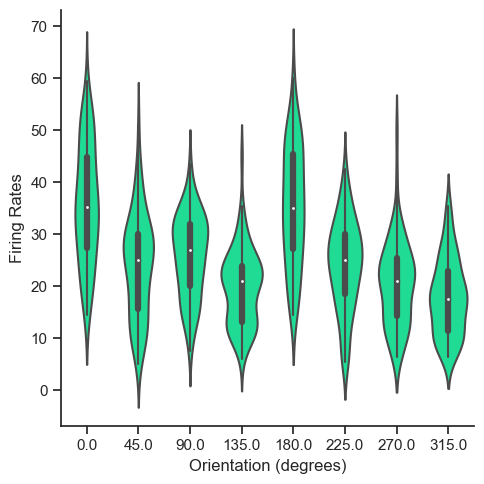

In [1454]:
#Distribution of Orientation vs. Firing Rates, was not used for paper 

sns.catplot(x='orientation', y='firing rates', data = data, kind = 'violin', color = 'mediumspringgreen')
plt.xlabel("Orientation (degrees)")
plt.ylabel("Firing Rates")

Text(16.694444444444443, 0.5, 'Firing Rates')

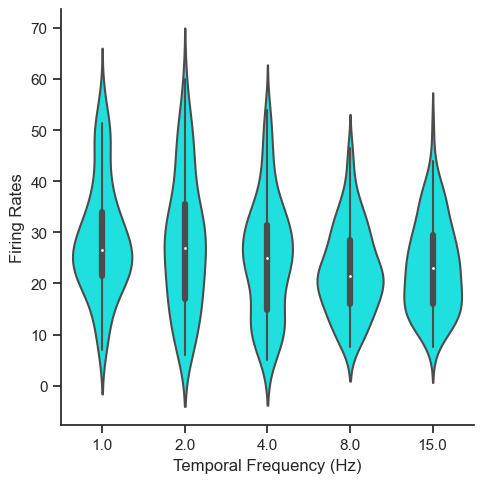

In [1455]:
# was not used for paper 
sns.catplot(x='temp freq', y='firing rates', data = data, kind = 'violin', color = 'cyan')
plt.xlabel("Temporal Frequency (Hz)")
plt.ylabel("Firing Rates")